In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st
import joblib

sns.set()
np.random.seed(7)

In [2]:
df = pd.read_csv('../data/processed/combined_cleaned_data.csv')
df["date"] = pd.to_datetime(df["date"])

df["date"] = df["date"].values.astype("datetime64[s]").astype(float)
ticker_map = {"AAPL": 1, "MSFT": 2, "GOOGL": 3, "AMZN": 4, "META": 5}
df["ticker"] = df["ticker"].map(ticker_map)
df.head()

,date,close,ticker
0,1.747786e+09,0.177952,1
1,1.747872e+09,0.158905,1
2,1.747958e+09,0.000000,1
3,1.748304e+09,0.128898,1
4,1.748390e+09,0.134377,1


In [4]:
X = df[['date','ticker']]
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
joblib.dump(lr, '../model/model.pkl')
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')

Baseline   R²=0.7058  RMSE=0.017607


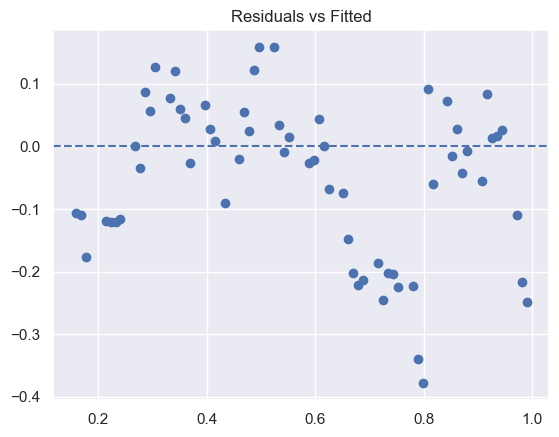

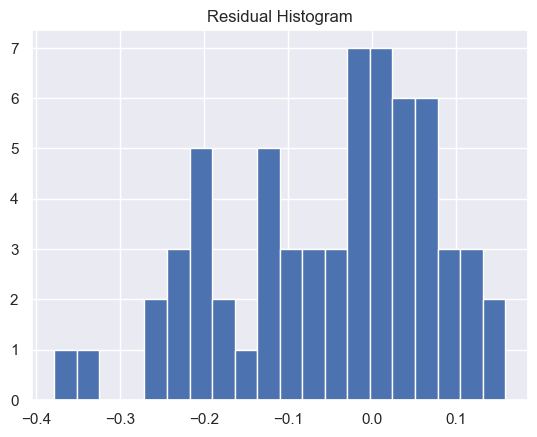

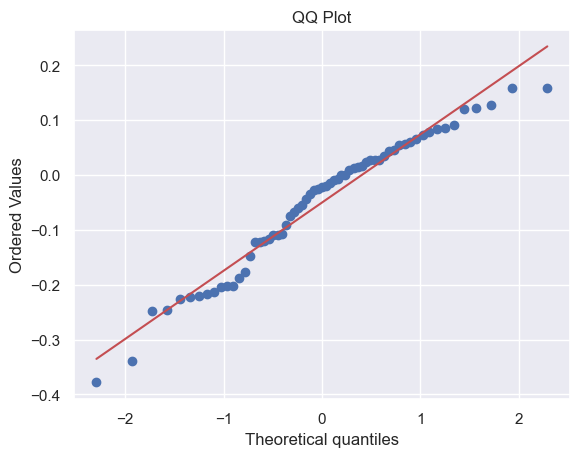

In [11]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()